In [37]:
import sys
print('Python: {}'.format(sys.version))
import scipy
print('Scipy: {}'.format(scipy.__version__))
import numpy
print('Numpy: {}'.format(numpy.__version__))
import pandas
print('Pandas: {}'.format(pandas.__version__))
import matplotlib
print('Matplotlib: {}'.format(matplotlib.__version__))
import sklearn
print('Sklearn: {}'.format(sklearn.__version__))

Python: 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Scipy: 1.3.0
Numpy: 1.16.4
Pandas: 0.24.2
Matplotlib: 3.1.0
Sklearn: 0.21.2


In [38]:
import pandas
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

In [39]:
#loading the dataset

dataset= pandas.read_csv("iris.csv")

In [7]:
#figuring the dimentions and investegating the data
print(dataset.shape)
print(dataset.head(20))
#descrining the details about the data-statistical
print(dataset.describe())

(150, 5)
    sepal.length  sepal.width  petal.length  petal.width variety
0            5.1          3.5           1.4          0.2  Setosa
1            4.9          3.0           1.4          0.2  Setosa
2            4.7          3.2           1.3          0.2  Setosa
3            4.6          3.1           1.5          0.2  Setosa
4            5.0          3.6           1.4          0.2  Setosa
5            5.4          3.9           1.7          0.4  Setosa
6            4.6          3.4           1.4          0.3  Setosa
7            5.0          3.4           1.5          0.2  Setosa
8            4.4          2.9           1.4          0.2  Setosa
9            4.9          3.1           1.5          0.1  Setosa
10           5.4          3.7           1.5          0.2  Setosa
11           4.8          3.4           1.6          0.2  Setosa
12           4.8          3.0           1.4          0.1  Setosa
13           4.3          3.0           1.1          0.1  Setosa
14           5.8

In [8]:
#class distrubtion-classifiction based on one class
print(dataset.groupby('variety').size())

variety
Setosa        50
Versicolor    50
Virginica     50
dtype: int64


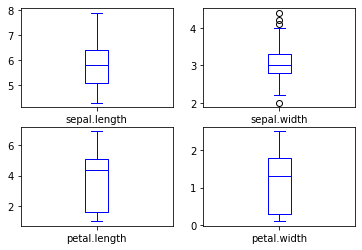

In [9]:
#univariate plots- box and whisker plot
dataset.plot(kind='box',subplots=True,layout=(2,2),sharex=False, sharey=False, color='Blue')
pyplot.show()

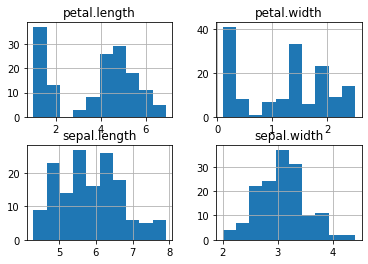

In [10]:
#histogram of the variable
dataset.hist()
pyplot.show()

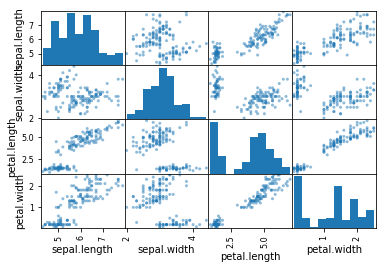

In [11]:
#multivariet plots-scatter plots to understand structural relationships between plots
scatter_matrix(dataset)
pyplot.show()

In [12]:
#creating a validation dataset
#splitting the dataset into 80-20
array=dataset.values
X= array[:,0:4]
y=array[:,4]
X_train,X_validation,Y_train,Y_validation=train_test_split(X,y,test_size=0.2,random_state=1)

In [29]:
#Logistic Regression
#linear discriminant 
#KNearenst Neighbours-NL(NON LINEAR)
#classification and regression trees-NL
#Gaussian Naive Bayes-NL
#Support Vector Machines-NL

#building models
models = []
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB',GaussianNB())) 
models.append(('SVM',SVC(gamma='auto')))

In [30]:
#evaluate the created models
results = []
names = []
for name, model in models:
    kfold=StratifiedKFold(n_splits=10,random_state=1)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.960897 (0.052113)
LDA: 0.973974 (0.040110)
KNN: 0.957191 (0.043263)
NB: 0.948858 (0.056322)
SVM: 0.983974 (0.032083)


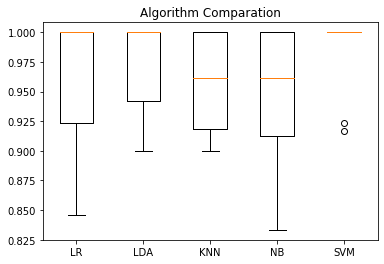

In [31]:
#comparing the models
pyplot.boxplot(results,labels=names)
pyplot.title('Algorithm Comparation')
pyplot.show()

In [34]:
#picking SVM as the best fit model 
#making predictions on SVM
model=SVC(gamma = 'auto')
model.fit(X_train, Y_train)
predictions=model.predict(X_validation)

In [40]:
#Evaluting out predictions
print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       1.00      0.92      0.96        13
   Virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

